In [1]:
import pandas as pd
from IPython.display import display

from graphing import *
import numpy as np
from matplotlib import pyplot as plt

import re

In [5]:
def shiftTimeStamp(row):
    return row['timeStamp'] - 1688695066761

df = pd.read_csv('day0.csv')
#df['modTimeStamp'] = df.apply(shiftTimeStamp, axis=1)

tests = Test(df, 60)

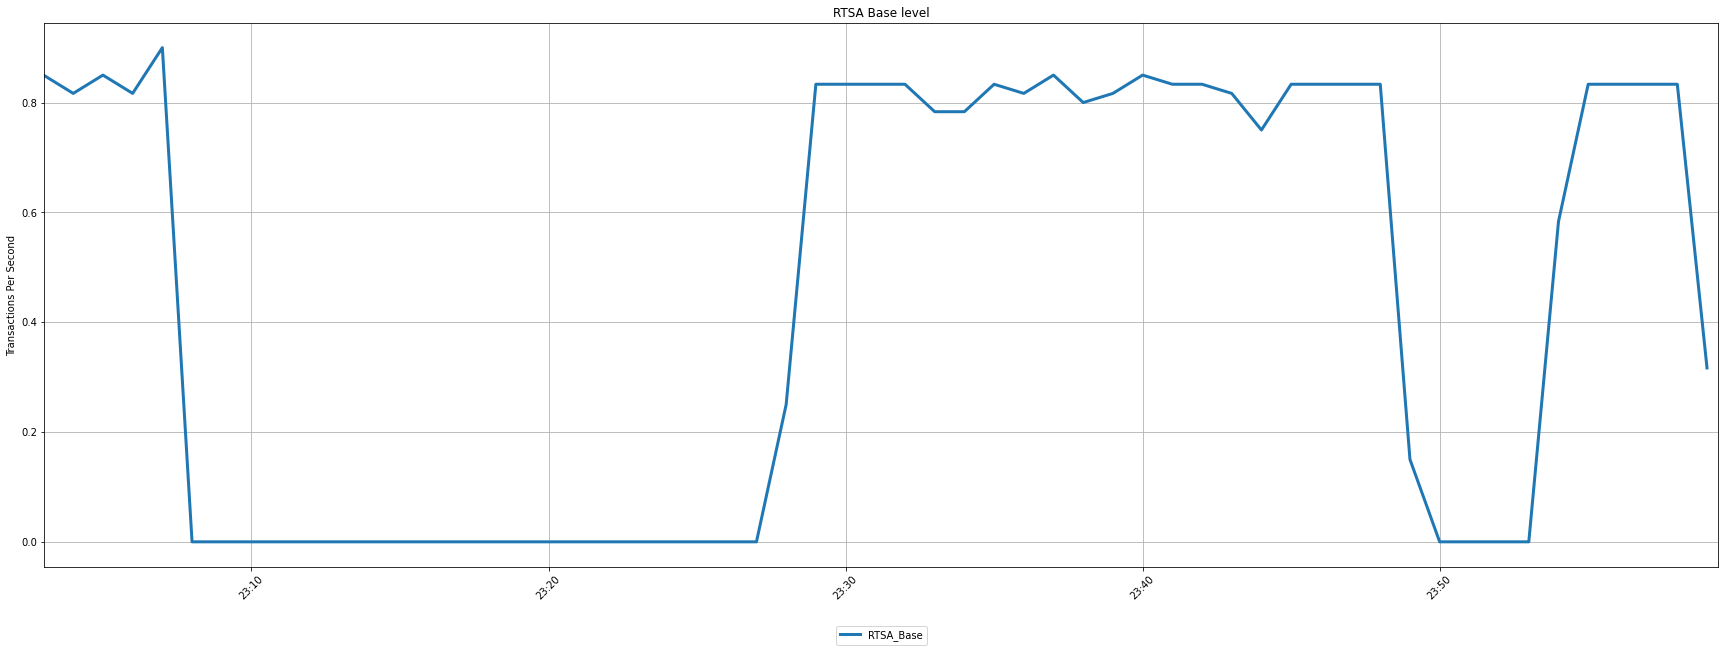

In [9]:
tests.time_series_unit('RTSA_Base', 'RTSA Base level','txn_per_sec')

In [7]:
tests.unique_labels

array(['Token_RTSA', 'Token_SalesOrder', 'Token_QSL', 'Token_WG',
       'Token_TnT', 'TnT_Base', 'RTSA_EDD_Base', 'RTSA_Base',
       'SalesOrder_Base', 'QSL_Base', 'RTSA_25th_MAX',
       'RTSA_EDD_25th_MAX', 'RTSA_75th_MAX', 'RTSA_EDD_75th_MAX',
       'SalesOrder_1500', 'SalesOrder_4500', 'TnT_10Th_MAX', 'QSL_200',
       'RTSA_50Th_MAX', 'SalesOrder_5th_MAX'], dtype=object)

In [8]:

base_regex = re.compile(r'.*_Base$')

base = [item for item in tests.unique_labels if re.match(base_regex, item)]
tokens = [item for item in tests.unique_labels if item.startswith('Token_')]
main = [i for i in tests.unique_labels if (not re.match(base_regex,i)) and (not i.startswith('Token_'))]

print(base)
print(tokens)
print(main)

['TnT_Base', 'RTSA_EDD_Base', 'RTSA_Base', 'SalesOrder_Base', 'QSL_Base']
['Token_RTSA', 'Token_SalesOrder', 'Token_QSL', 'Token_WG', 'Token_TnT']
['RTSA_25th_MAX', 'RTSA_EDD_25th_MAX', 'RTSA_75th_MAX', 'RTSA_EDD_75th_MAX', 'SalesOrder_1500', 'SalesOrder_4500', 'TnT_10Th_MAX', 'QSL_200', 'RTSA_50Th_MAX', 'SalesOrder_5th_MAX']


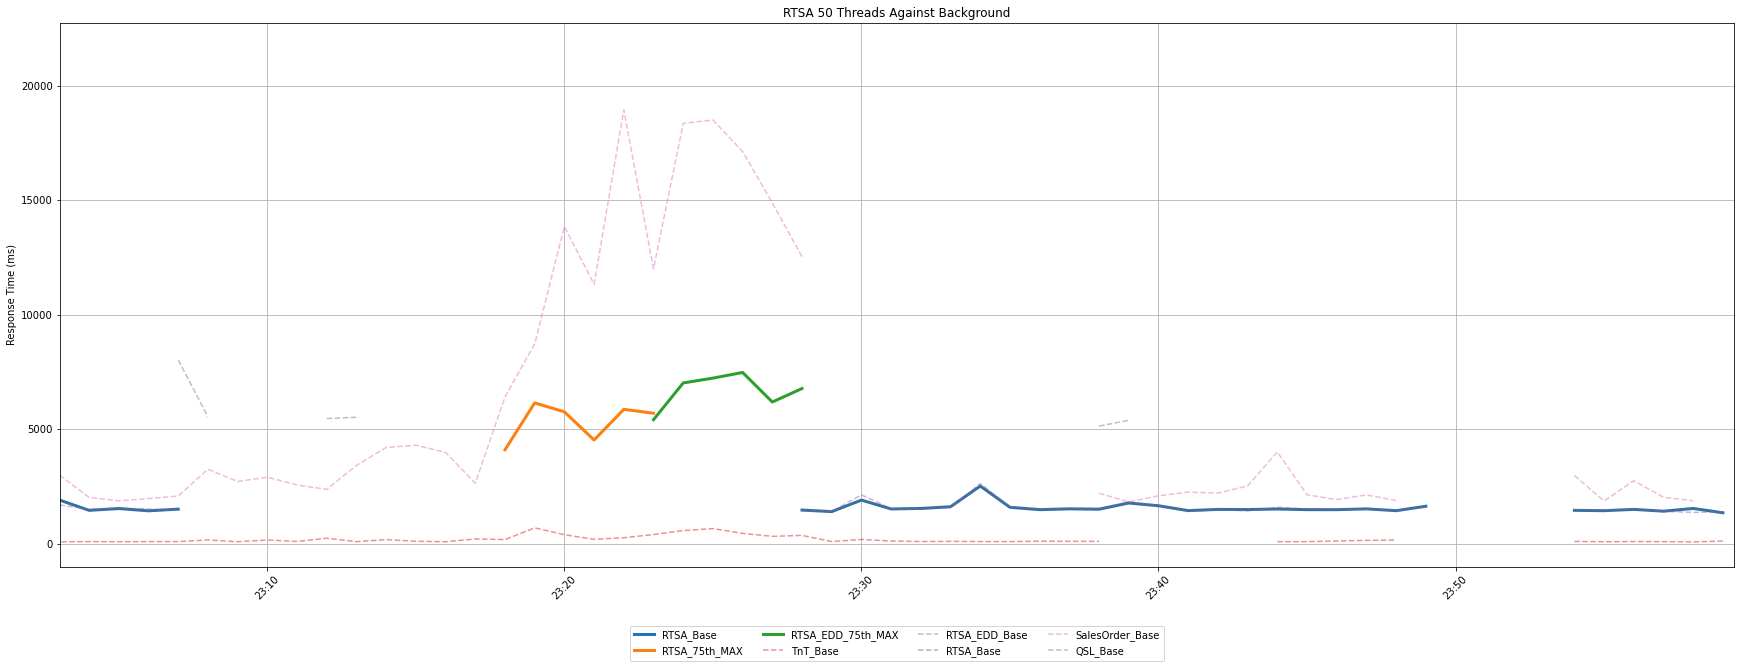

In [14]:
tests.time_series_by_labels(['RTSA_Base','RTSA_75th_MAX', 'RTSA_EDD_75th_MAX'],base,'RTSA 50 Threads Against Background', metric='avg_res')

In [15]:
RTSA = [item for item in tests.unique_labels if (item.startswith('RTSA_') and not item.startswith('RTSA_E'))]
RTSA_EDD = [item for item in tests.unique_labels if item.startswith('RTSA_EDD')]
TnT = [item for item in tests.unique_labels if item.startswith('TnT_')]
SalesOrder = [item for item in tests.unique_labels if item.startswith('SalesOrder_')]
QSL = [item for item in tests.unique_labels if item.startswith('QSL_')]
WG = [item for item in tests.unique_labels if item.startswith('WG_')]
labels_dict = {'RTSA': RTSA,'RTSA_EDD':RTSA_EDD, "TnT": TnT, 'SalesOrder':SalesOrder, 'QSL': QSL, 'WG':WG }

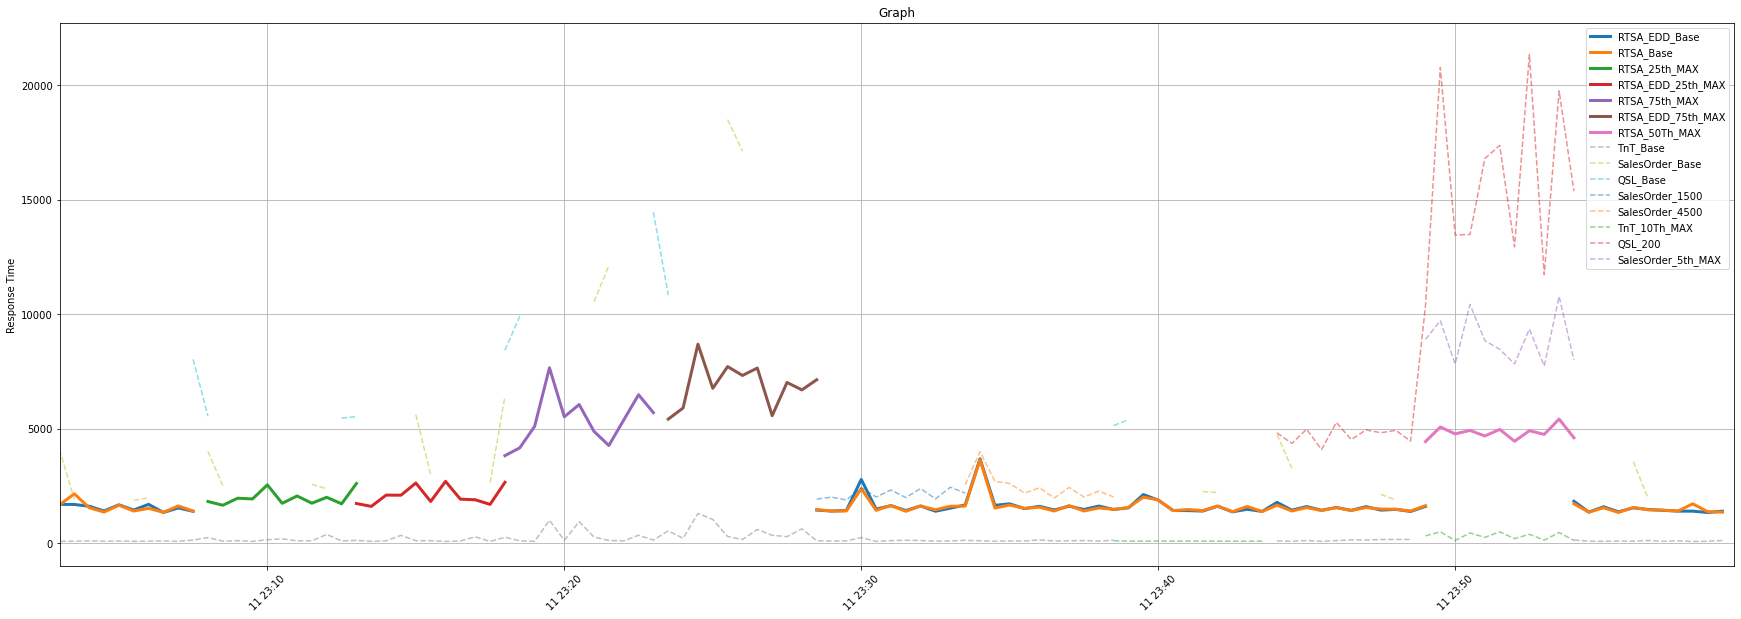

In [44]:
tests.time_series_by_labels(RTSA+RTSA_EDD ,SalesOrder+TnT+WG+QSL )

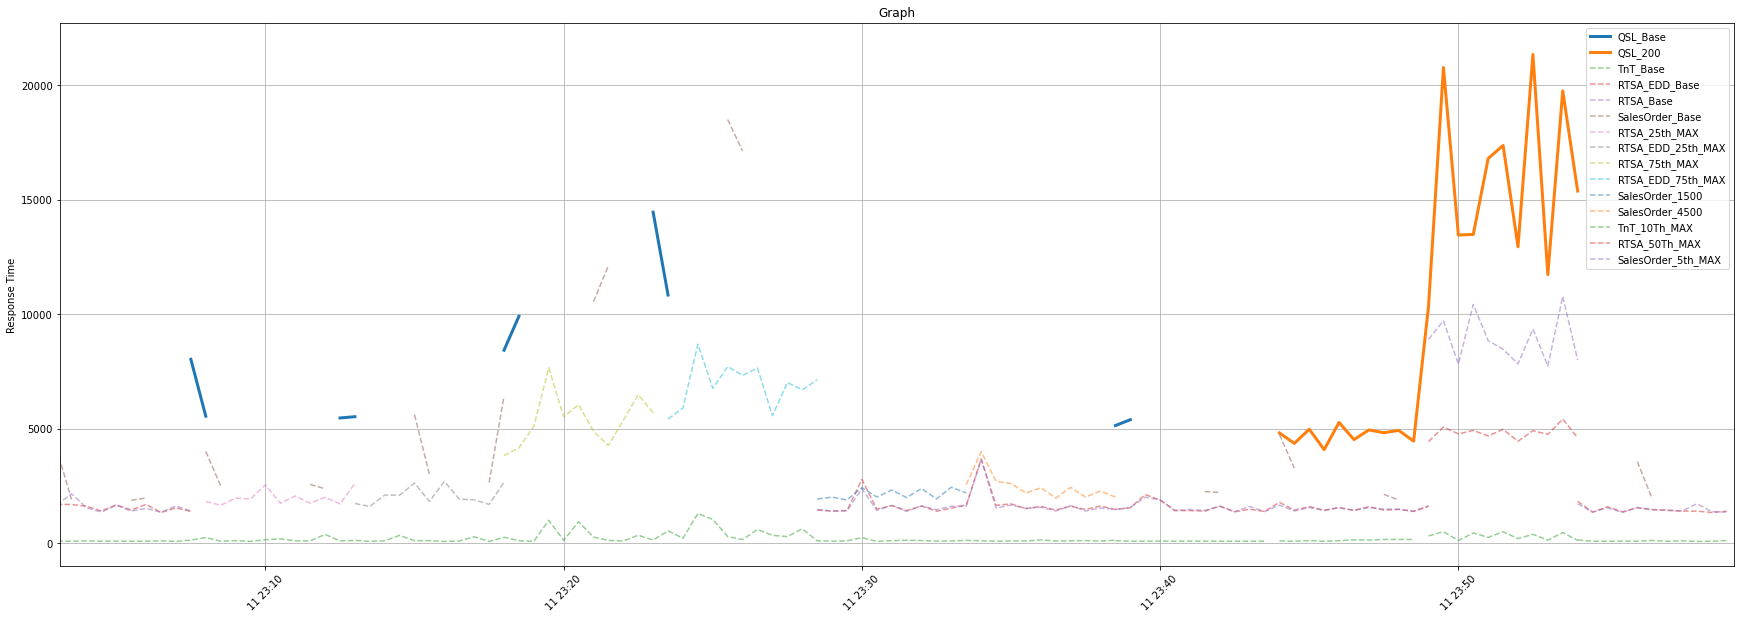

In [45]:
tests.time_series_by_labels(QSL ,SalesOrder+TnT+WG+RTSA+RTSA_EDD )

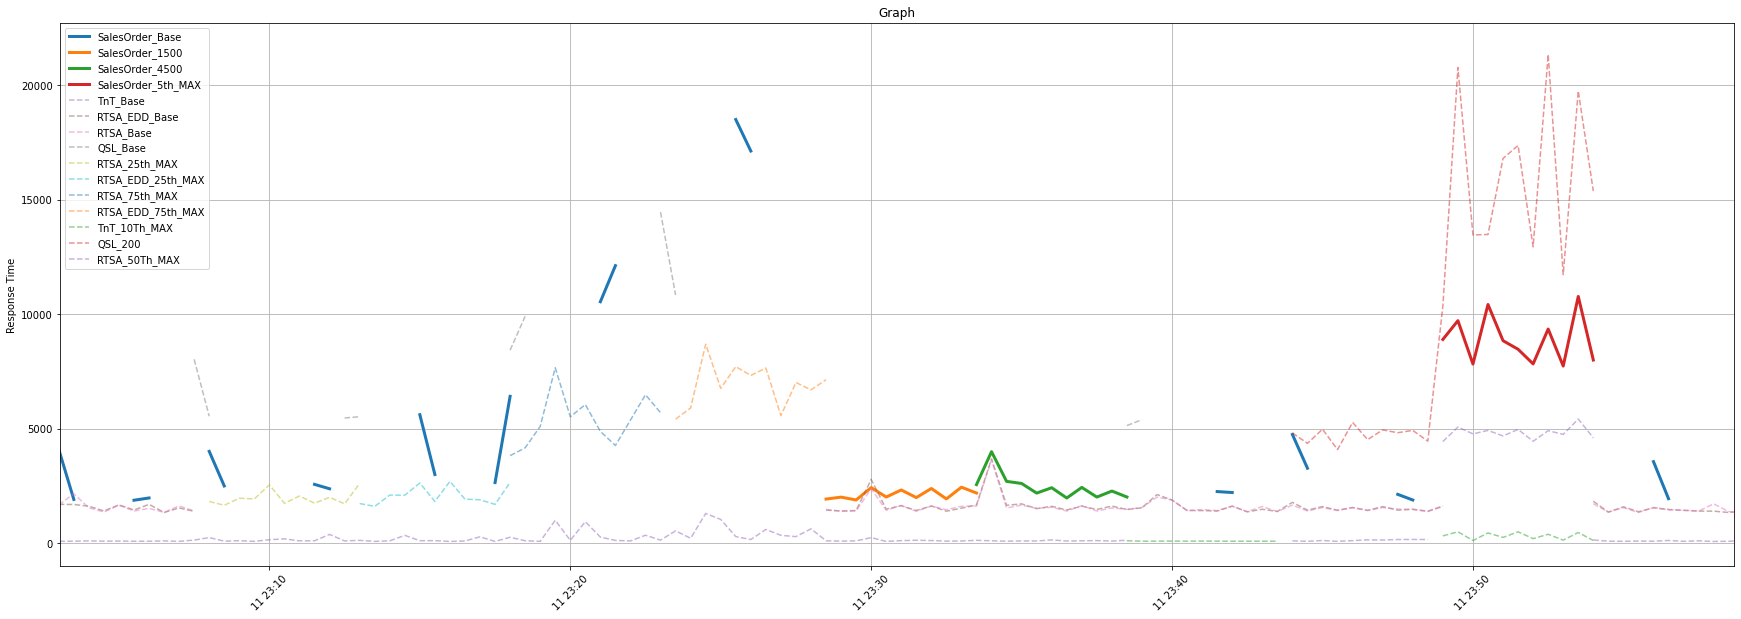

In [47]:
tests.time_series_by_labels(SalesOrder, TnT+QSL+RTSA+RTSA_EDD)

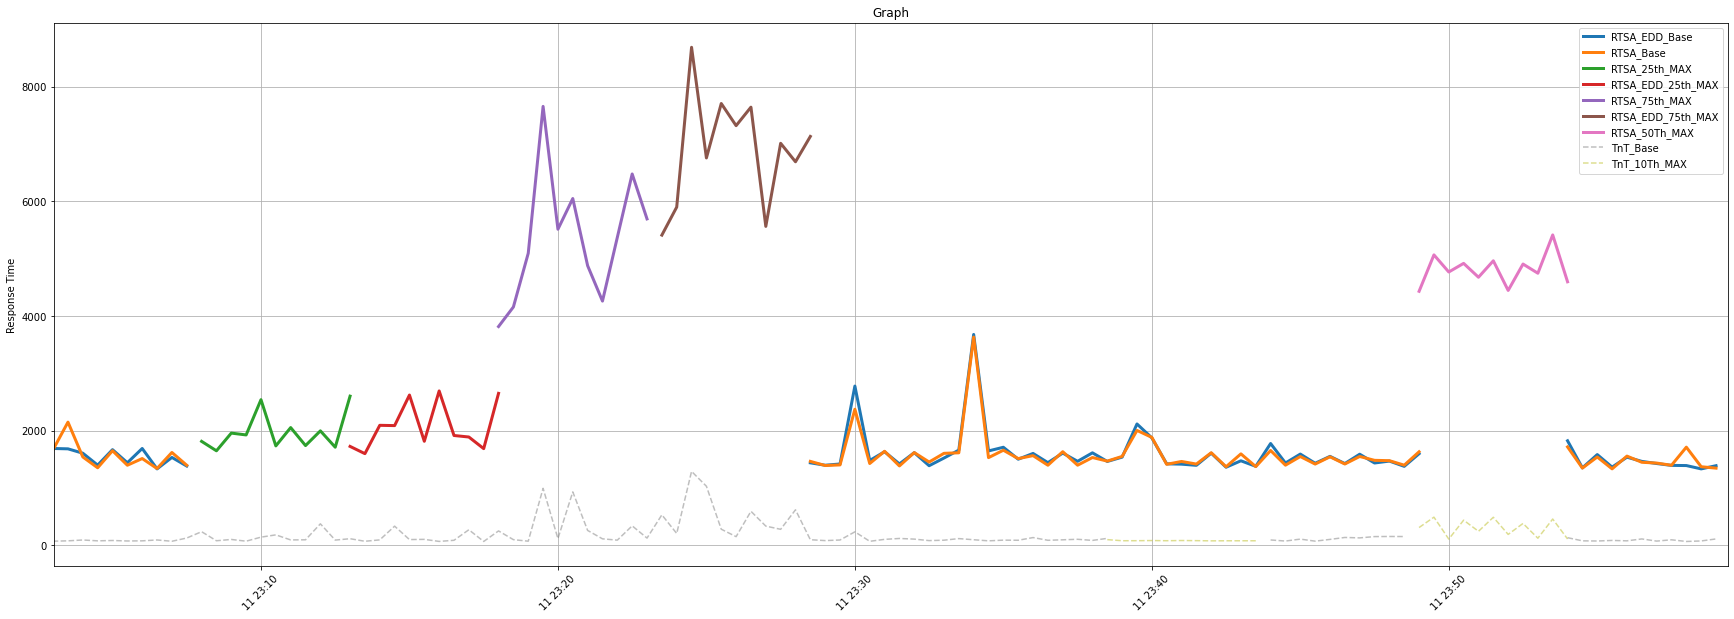

In [24]:
tests.time_series_by_category('RTSA', 'TnT')

In [17]:
other = pd.read_csv('SCM-3 and lz.csv')
unique_labels = other['integration'].unique()

# Create a dictionary to store the dataframes
LZ_To_FS = other[other['integration']=='TPG-R2-L008-SCH']
SCM_3 = other[other['integration']== 'TPG-R2-L008A']
SCM_3.head()


,integration,Time,RunTime,Unnamed: 3
11,TPG-R2-L008A,10:25:00,0.0,NaN
12,TPG-R2-L008A,10:14:59,13.0,NaN
13,TPG-R2-L008A,10:05:00,16.0,NaN
14,TPG-R2-L008A,9:54:56,9.0,NaN
15,TPG-R2-L008A,9:44:56,17.0,NaN


TPG-R2-L008-SCH
TPG-R2-L008A


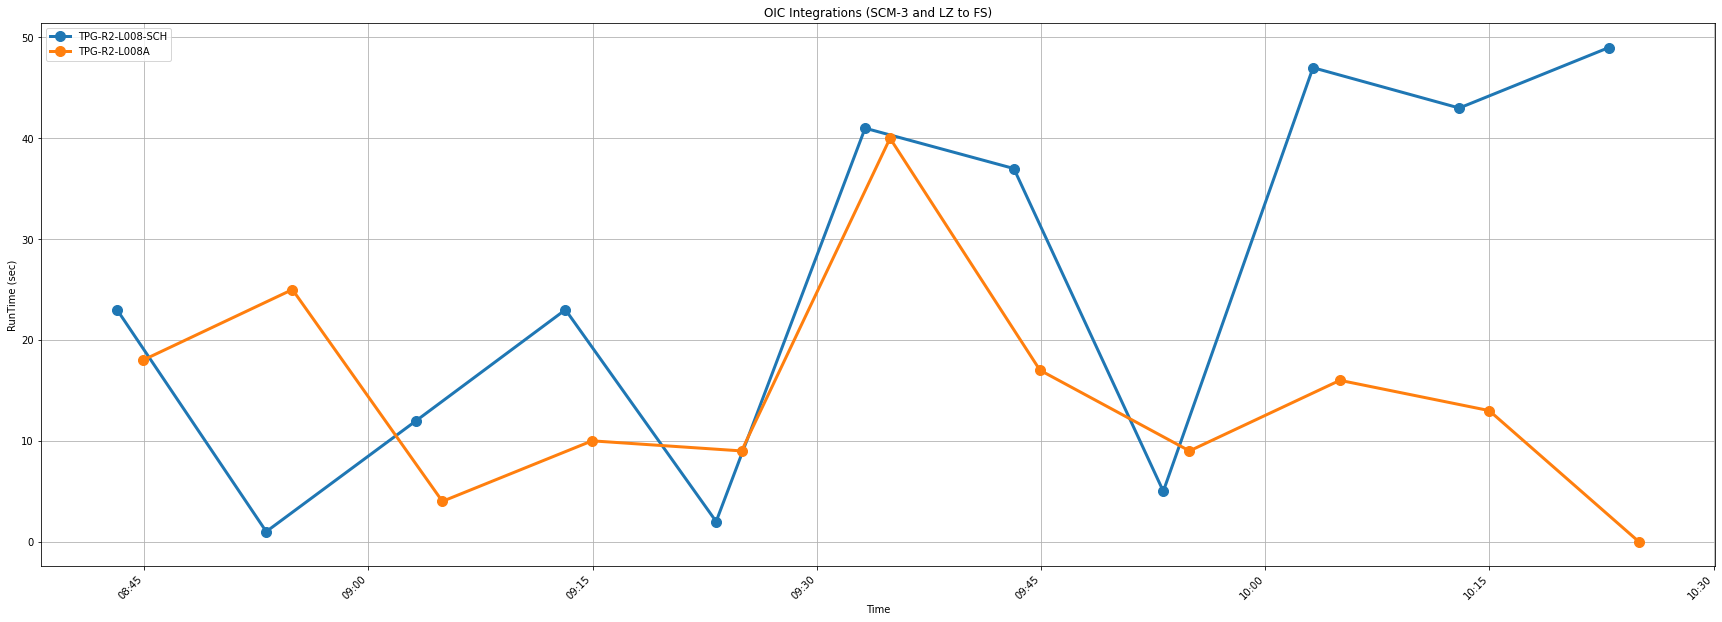

In [23]:
other['Time'] = pd.to_datetime(other['Time'])
other.sort_values(by = 'Time', inplace=True)
# Group the data by 'integration' and plot the 'RunTime' over time
fig, ax = plt.subplots(figsize=(30, 10))

for integration, data in other.groupby('integration'):
    print(integration)
    ax.plot(data['Time'], data['RunTime'], label=integration, lw=3, marker='o', markersize=10)

# Set the x-axis label, y-axis label, and plot title
ax.set_xlabel('Time')
ax.set_ylabel('RunTime (sec)')
ax.set_title('OIC Integrations (SCM-3 and LZ to FS)')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
# Add a legend
ax.legend()
plt.grid()
# Rotate and align the x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()